In [133]:
pwd

'/Users/laurenhughes/Documents/Flatiron/Project '

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [135]:
#Here I am importing the source data - taken from NHS workforce statistics data. I have just selected the Gender source data. 

nhs_gen = pd.read_excel('/Users/laurenhughes/Flatiron/NHSWFD.xlsx', sheet_name='Source data - Gender')

In [136]:
nhs_gen

,Data Month,Main staff group,Staff group 1,Gender,Grade,HC
0,2009-09-30,All staff groups,All staff groups,All genders,All grades,1154679
1,2009-09-30,All staff groups,All staff groups,Female,All grades,895160
2,2009-09-30,All staff groups,All staff groups,Male,All grades,259519
3,2009-09-30,NHS infrastructure support,All staff groups,All genders,All grades,215502
4,2009-09-30,NHS infrastructure support,All staff groups,Female,All grades,147491
...,...,...,...,...,...,...
6188,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 7,352
6189,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8a,67
6190,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8b,13
6191,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8c,4


In [137]:
nhs_gen['Staff group 1'].value_counts()

Central functions                            546
Support to doctors, nurses & midwives        539
Support to ST&T staff                        515
Managers                                     513
Unknown                                      511
Nurses & health visitors                     499
Hotel, property & estates                    495
Support to ambulance staff                   446
Scientific, therapeutic & technical staff    435
HCHS Doctors                                 429
Ambulance staff                              382
Senior managers                              357
Midwives                                     331
All staff groups                             195
Name: Staff group 1, dtype: int64

In [138]:
#Here I am isolating the data from December 2020 as the source data contained the counts in all months of 2020

nhs_gen = nhs_gen.loc[nhs_gen['Data Month'] == '2020-12-31']
nhs_gen

,Data Month,Main staff group,Staff group 1,Gender,Grade,HC
5721,2020-12-31,All staff groups,All staff groups,All genders,All grades,1319010
5722,2020-12-31,All staff groups,All staff groups,Female,All grades,1009861
5723,2020-12-31,All staff groups,All staff groups,Male,All grades,309149
5724,2020-12-31,NHS infrastructure support,All staff groups,All genders,All grades,212658
5725,2020-12-31,NHS infrastructure support,All staff groups,Female,All grades,138399
...,...,...,...,...,...,...
6188,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 7,352
6189,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8a,67
6190,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8b,13
6191,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8c,4


In [139]:
nhs_gen = nhs_gen.loc[nhs_gen['Main staff group'] != 'All staff groups']
nhs_gen = nhs_gen.loc[nhs_gen['Staff group 1'] != 'All staff groups']
nhs_gen = nhs_gen.loc[nhs_gen['Gender'] != 'All genders']
nhs_gen

,Data Month,Main staff group,Staff group 1,Gender,Grade,HC
5741,2020-12-31,NHS infrastructure support,Central functions,Female,All grades,75136
5742,2020-12-31,NHS infrastructure support,Central functions,Female,Band 1,23
5743,2020-12-31,NHS infrastructure support,Central functions,Female,Band 2,8397
5744,2020-12-31,NHS infrastructure support,Central functions,Female,Band 3,15503
5745,2020-12-31,NHS infrastructure support,Central functions,Female,Band 4,15971
...,...,...,...,...,...,...
6188,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 7,352
6189,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8a,67
6190,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8b,13
6191,2020-12-31,Support to clinical staff,Support to ST&T staff,Male,Band 8c,4


In [140]:
genm = nhs_gen.loc[nhs_gen['Gender'] == 'Male']
genf = nhs_gen.loc[nhs_gen['Gender'] == 'Female']

In [141]:
genm = genm.drop(columns=['Data Month', 'Main staff group', 'Staff group 1', 'Gender'])
genf = genf.drop(columns=['Data Month', 'Main staff group', 'Staff group 1', 'Gender'])

In [142]:
genm = genm.rename(columns={'HC' : 'Males'})
genf = genf.rename(columns={'HC' : 'Females'})

In [143]:
genmt = genm.groupby('Grade').sum()
genft = genf.groupby('Grade').sum()
genmt['Females'] = genft['Females'].values
genmt

,Males,Females
Grade,,
All grades,309631,1011939
Associate Specialist,1290,852
Band 1,2619,6716
Band 2,44703,168059
Band 3,34107,134159
Band 4,20220,89694
Band 5,38728,196281
Band 6,41680,185442
Band 7,27233,108240


In [166]:
gen_fin = genmt.iloc[5:14]
gen_fin.reset_index(inplace=True)
gen_fin = gen_fin.rename(columns = {'index':'Grades'})
gen_fin

,Grade,Males,Females
0,Band 4,20220,89694
1,Band 5,38728,196281
2,Band 6,41680,185442
3,Band 7,27233,108240
4,Band 8a,12718,37104
5,Band 8b,5738,13004
6,Band 8c,3227,6128
7,Band 8d,1845,2883
8,Band 9,903,1131


In [167]:
gen_fin = gen_fin.append({'Grade' : 'Total', 
                               'Males' : (gen_fin['Males'].sum()), 
                               'Females' : (gen_fin['Females'].sum())} , 
                              ignore_index=True)

gen_fin

,Grade,Males,Females
0,Band 4,20220,89694
1,Band 5,38728,196281
2,Band 6,41680,185442
3,Band 7,27233,108240
4,Band 8a,12718,37104
5,Band 8b,5738,13004
6,Band 8c,3227,6128
7,Band 8d,1845,2883
8,Band 9,903,1131
9,Total,152292,639907


In [168]:
gen_fin['%M'] = gen_fin['Males'] * 100 /(gen_fin['Males'] + gen_fin['Females'])
gen_fin['%F'] = gen_fin['Females'] * 100 /(gen_fin['Males'] + gen_fin['Females'])
np.around(gen_fin, decimals = 1)


,Grade,Males,Females,%M,%F
0,Band 4,20220,89694,18.4,81.6
1,Band 5,38728,196281,16.5,83.5
2,Band 6,41680,185442,18.4,81.6
3,Band 7,27233,108240,20.1,79.9
4,Band 8a,12718,37104,25.5,74.5
5,Band 8b,5738,13004,30.6,69.4
6,Band 8c,3227,6128,34.5,65.5
7,Band 8d,1845,2883,39.0,61.0
8,Band 9,903,1131,44.4,55.6
9,Total,152292,639907,19.2,80.8


(0.0, 100.0)

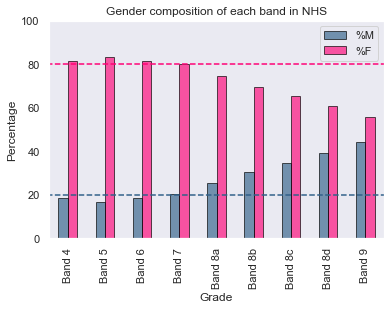

In [169]:
sns.set_theme(style="dark")
gen_fin[0:9].plot(x="Grade", y=["%M", "%F"], kind="bar", 
                     color=['#306089', '#ff0076'], 
                     alpha=0.65, edgecolor='black', 
                     xlabel = 'Grade',
                     ylabel = 'Percentage',
                     title='Gender composition of each band in NHS')

plt.hlines(19.8, xmin=-1, xmax=9, linestyles='dashed', color='#306089')
plt.hlines(80.2, xmin=-1, xmax=9, linestyles='dashed', color='#ff0076')
plt.ylim([0, 100])



In [174]:
gen_fin1 = gen_fin.iloc[0:9]

In [175]:
gen_fin1['%of_tot_M'] = (gen_fin1['Males'] / gen_fin1['Males'].sum()) * 100
gen_fin1['%of_tot_F'] = (gen_fin1['Females'] / gen_fin1['Females'].sum()) * 100

np.around(gen_fin1, decimals = 1)

<ipython-input-175-138307678ac9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_fin1['%of_tot_M'] = (gen_fin1['Males'] / gen_fin1['Males'].sum()) * 100
<ipython-input-175-138307678ac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_fin1['%of_tot_F'] = (gen_fin1['Females'] / gen_fin1['Females'].sum()) * 100


,Grade,Males,Females,%M,%F,%of_tot_M,%of_tot_F
0,Band 4,20220,89694,18.4,81.6,13.3,14.0
1,Band 5,38728,196281,16.5,83.5,25.4,30.7
2,Band 6,41680,185442,18.4,81.6,27.4,29.0
3,Band 7,27233,108240,20.1,79.9,17.9,16.9
4,Band 8a,12718,37104,25.5,74.5,8.4,5.8
5,Band 8b,5738,13004,30.6,69.4,3.8,2.0
6,Band 8c,3227,6128,34.5,65.5,2.1,1.0
7,Band 8d,1845,2883,39.0,61.0,1.2,0.5
8,Band 9,903,1131,44.4,55.6,0.6,0.2


<AxesSubplot:title={'center':'Distribution of genders across different bands in NHS'}, xlabel='Grade', ylabel='Percentage of total gender'>

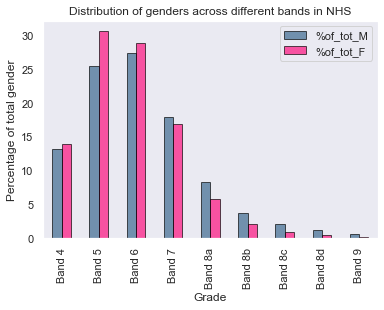

In [176]:
sns.set_theme(style="dark")
gen_fin1[0:9].plot(x="Grade", y=["%of_tot_M", "%of_tot_F"], kind="bar", 
                     color=['#306089', '#ff0076'], 
                     alpha=0.65, edgecolor='black', 
                     xlabel = 'Grade',
                     ylabel = 'Percentage of total gender',
                     title='Distribution of genders across different bands in NHS')

In [177]:
gen_fin1['Ratio%M:F'] = (gen_fin1['%of_tot_M'] / gen_fin1['%of_tot_F'])
np.around(gen_fin1, decimals = 1)

<ipython-input-177-758938544b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_fin1['Ratio%M:F'] = (gen_fin1['%of_tot_M'] / gen_fin1['%of_tot_F'])


,Grade,Males,Females,%M,%F,%of_tot_M,%of_tot_F,Ratio%M:F
0,Band 4,20220,89694,18.4,81.6,13.3,14.0,0.9
1,Band 5,38728,196281,16.5,83.5,25.4,30.7,0.8
2,Band 6,41680,185442,18.4,81.6,27.4,29.0,0.9
3,Band 7,27233,108240,20.1,79.9,17.9,16.9,1.1
4,Band 8a,12718,37104,25.5,74.5,8.4,5.8,1.4
5,Band 8b,5738,13004,30.6,69.4,3.8,2.0,1.9
6,Band 8c,3227,6128,34.5,65.5,2.1,1.0,2.2
7,Band 8d,1845,2883,39.0,61.0,1.2,0.5,2.7
8,Band 9,903,1131,44.4,55.6,0.6,0.2,3.4


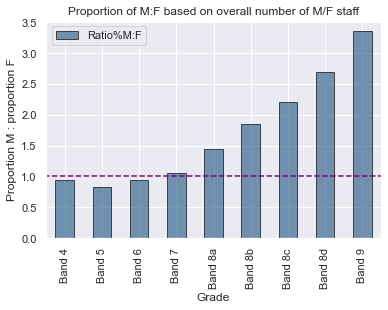

In [206]:
sns.set_theme(style="darkgrid")
gen_fin1[0:9].plot(x="Grade", y=["Ratio%M:F"], kind="bar", 
                     color=['#306089', '#ff0076'], 
                     alpha=0.65, edgecolor='black', 
                     xlabel = 'Grade',
                     ylabel = 'Proportion M : proportion F',
                     title='Proportion of M:F based on overall number of M/F staff')

plt.hlines(1.0, xmin=-1, xmax=9, linestyles='dashed', color='#800076')



In [193]:
hcs_gen = pd.read_csv('/Users/laurenhughes/Flatiron/HCS_genderdata.csv')
hcs_gen = hcs_gen.drop(columns=['Unnamed: 0', 'Males', 'Females', '%M', '%F', '%of_tot_M', '%of_tot_F'])
hcs_gen = hcs_gen.rename(columns={'Ratio%M:F' : 'HCSRatio'})
hcs_gen['TotRatio'] = (gen_fin1['Ratio%M:F'])
hcs_gen

,Grade,HCSRatio,TotRatio
0,Band 4,0.736985,0.947235
1,Band 5,1.038529,0.829061
2,Band 6,0.963143,0.944407
3,Band 7,0.914490,1.057176
4,Band 8a,1.114967,1.440250
5,Band 8b,1.259844,1.854058
6,Band 8c,1.508063,2.212687
7,Band 8d,2.813103,2.689004
8,Band 9,4.515551,3.354787
9,Total,1.000000,NaN


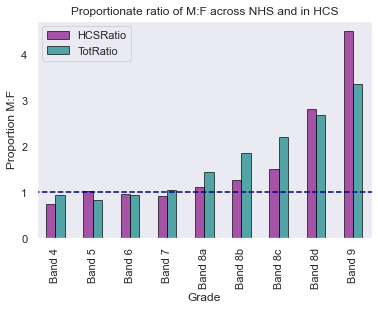

In [207]:
sns.set_theme(style="dark")
hcs_gen[0:9].plot(x="Grade", y=["HCSRatio", "TotRatio"], kind="bar", 
                     color=['Purple', 'Teal'], 
                     alpha=0.65, edgecolor='black', 
                     xlabel = 'Grade',
                     ylabel = 'Proportion M:F',
                     title='Proportionate ratio of M:F across NHS and in HCS')

plt.hlines(1.0, xmin=-1, xmax=9, linestyles='dashed', color='#000076')